In [1]:
! python -m pip install scikit-learn

In [2]:
! pip install matplotlib

In [3]:
! pip install imblearn

In [5]:
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=4,
 n_clusters_per_class=1, weights=[0.99])
# summarize class distribution

counter = Counter(y)
print(counter)

Counter({np.int64(0): 9852, np.int64(1): 148})


### Train - Test split

In [36]:
from sklearn.model_selection import train_test_split
# i.e. 80 % training dataset and 20 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

### Balance the dataset

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Distribution plot of each feature

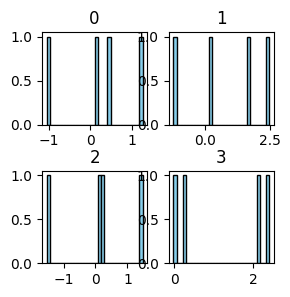

In [38]:
import matplotlib.pyplot as plt

# define subplot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(3, 3))
plt.subplots_adjust(hspace=0.5)

# loop through tickers and axes
for i,ax in enumerate(axs.ravel()):
    
    ax.hist(X_train[i], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(i)

plt.show()

### Hyperparameter tuning with CV

In [14]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10]
}

# create an instance of the grid search object
g1 = GridSearchCV(AdaBoostClassifier(), parameters, cv=10, n_jobs=-1)

g1.fit(X_train,y_train)

# show best parameter configuration found for classifier
cls_params1 = g1.best_params_
cls_params1

/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527

{'learning_rate': 0.01, 'n_estimators': 70}

### Fit the Adaboost classifier

In [15]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=70, learning_rate=0.01, random_state=42)

clf.fit(X, y)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find f1 or error
from sklearn import metrics  
 
# using metrics module for f1 calculation
print("F1_score of the model:", metrics.f1_score(y_test, y_pred))

/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


F1_score of the model: 0.72


# Addition of Data

In [16]:
import numpy as np

X1, y1 = make_classification(n_samples=2000, n_features=4,
 n_clusters_per_class=1, weights=[0.99]) 

X2 = np.concatenate([X,X1], axis=0)
y2 = np.concatenate([y,y1], axis=0)

counter = Counter(y2)
print(counter)

Counter({np.int64(0): 11822, np.int64(1): 178})


In [17]:
from sklearn.model_selection import train_test_split
# i.e. 80 % training dataset and 20 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.20, random_state=42)

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

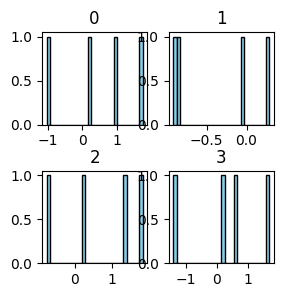

In [18]:
import matplotlib.pyplot as plt

# define subplot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(3, 3))
plt.subplots_adjust(hspace=0.5)

# loop through tickers and axes
for i,ax in enumerate(axs.ravel()):
    
    ax.hist(X_train[i], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(i)

plt.show()

In [20]:
# setup parameter space
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10]
}

# create an instance of the grid search object
g1 = GridSearchCV(AdaBoostClassifier(), parameters, cv=10, n_jobs=-1)

g1.fit(X_train,y_train)

# show best parameter configuration found for classifier
cls_params1 = g1.best_params_
cls_params1

/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527

{'learning_rate': 1, 'n_estimators': 90}

### Results with old hyperparameters

In [21]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=70, learning_rate=0.01, random_state=42)

clf.fit(X, y)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find f1 or error
from sklearn import metrics  
 
# using metrics module for f1 calculation
print("F1_score of the model:", metrics.f1_score(y_test, y_pred))

/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


F1_score of the model: 0.16184971098265896


### Results with tuned hyperparameters

In [22]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=90, learning_rate=1, random_state=42)

clf.fit(X, y)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find f1 or error
from sklearn import metrics  
 
# using metrics module for f1 calculation
print("F1_score of the model:", metrics.f1_score(y_test, y_pred))

/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


F1_score of the model: 0.5567010309278351


# Deletion of Data

In [23]:
import random
 
rand_list=[]
n=2000
for i in range(n):
    rand_list.append(random.randint(3,9))
    
X1 = np.delete(X, rand_list, axis=0)
y1 = np.delete(y, rand_list, axis=0)

In [24]:
from sklearn.model_selection import train_test_split
# i.e. 80 % training dataset and 20 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state=42)

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

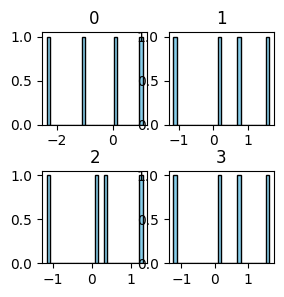

In [26]:
# define subplot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(3, 3))
plt.subplots_adjust(hspace=0.5)

# loop through tickers and axes
for i,ax in enumerate(axs.ravel()):
    
    ax.hist(X_train[i], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(i)

plt.show()

In [29]:
# setup parameter space
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10]
}

# create an instance of the grid search object
g1 = GridSearchCV(AdaBoostClassifier(), parameters, cv=10, n_jobs=-1)

g1.fit(X_train,y_train)

# show best parameter configuration found for classifier
cls_params1 = g1.best_params_
cls_params1

/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527

{'learning_rate': 0.001, 'n_estimators': 50}

### Results with old hyperparameters

In [32]:
# creating a RF classifier
clf = AdaBoostClassifier(n_estimators=70, learning_rate=0.01, random_state=42)  
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find f1 or error
from sklearn import metrics  
 
# using metrics module for f1 calculation
print("F1_score of the model:", metrics.f1_score(y_test, y_pred))

/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


F1_score of the model: 0.6190476190476191


### Results with tuned hyperparameters

In [33]:
# creating a RF classifier
clf = AdaBoostClassifier(n_estimators=50, learning_rate=0.001, random_state=42)  
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find f1 or error
from sklearn import metrics
 
# using metrics module for f1 calculation
print("F1_score of the model:", metrics.f1_score(y_test, y_pred))

/Users/sheetalpandrekar/opt/miniconda3/envs/digially_asgn/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


F1_score of the model: 0.6190476190476191
